In [3]:
import sys
# win:
# project_path = 'D:/Code/repos/gad1b-redistribution/src'
# wsl:
project_path = 'D:/Code/repos/pwreg'
sys.path.insert(1, f'{project_path}/pwreg')

from core.core import *
from visualize.viewers import *
from utils.synapse import *

import pandas as pd
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

project_path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'D:/Code/repos/pwreg'

# Apply all transforms to points

In [4]:
segmentation_folder = 'D:/Code/repos/psd95_segmentation/models/two_small_cnns/predictions/Gad1b_2021/Sequential_2tp_control/'
ptc1 = Points.from_predictions(f'{segmentation_folder}ML_segmentation_1-20GA_12-22-2021_2CNN_gui.csv', prob_thr=0.5, units='pix', resolution=[0.658, 0.23, 0.23])
ptc2 = Points.from_predictions(f'{segmentation_folder}ML_segmentation_1-20G6_12-22-2021_2CNN_gui.csv', prob_thr=0.5, units='pix', resolution=[0.658, 0.23, 0.23])

# preprocess points
# copy masks from when you were preprocessing the Images ... 
mask_tp1 = {'zmin': 51,'zmax': 168 + 1}
mask_tp2 = {'zmin': 51,'zmax': 164 + 1}
ptc1 = ptc1.crop(mask_tp2, units='pix')
ptc2 = ptc2.crop(mask_tp1, units='pix')
ptc1 = ptc1.recenter([mask_tp1['zmin'],0,0], units = 'pix')
ptc2 = ptc2.recenter([mask_tp2['zmin'],0,0], units = 'pix')

# apply transforms to tp2 
af = AffineTransform.from_json(f'{project_path}/data/processed/registered/no_change_control/testing_synapses/1-20FJ_to_1-20FM_affine_global_alignment_v03282022.json')
ptc2_af = ptc2.transform(af, units='phs')
bps = BlockPairs.from_json(f'{project_path}/data/processed/registered/no_change_control/testing_synapses/1-20FJ_to_1-20FM_pw_block_pairs_700_v03282022.json')
ptc2_pw = ptc2_af.pw_transform(bps.pairs)

100%|█████████████████████████████████████████████████████████████████████████████| 700/700 [00:00<00:00, 43853.81it/s]


# output stuff to be visualised 

## lost vs gained

In [6]:
radius = 1
synapse_study = PwSynapsePair(ptc1,ptc2_pw,radius)

100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [07:27<00:00,  1.56it/s]


In [29]:
blocks = [pair.blc1 for pair in bps.pairs]

In [30]:
ch = synapse_study.get_unique_match(blocks)

In [31]:
ch['tot_num']['per1'].max()

2

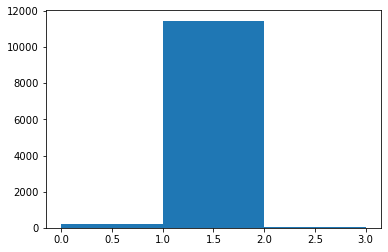

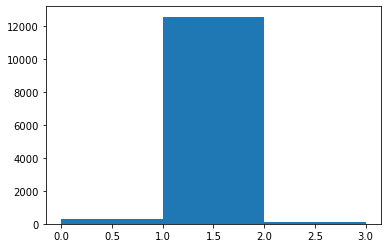

IndexError: boolean index did not match indexed array along dimension 0; dimension is 11558 but corresponding boolean dimension is 11696

In [26]:
plt.hist(ch['tot_num']['per1'],bins = [0,1,2,3])
plt.show()
plt.hist(ch['tot_num']['per2'],bins = [0,1,2,3])
plt.show()
plt.hist(ch['tot_num']['per2'][ch['unique']['per1'][ch['tot_num']['per1']>1]],bins = [0,1,2,3])

1

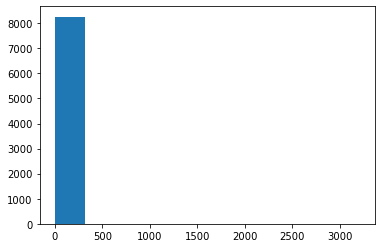

In [59]:
one_choice_only1 = np.concatenate(np.array(ch['unique']['per1'] , dtype=list)[ch['tot_num']['per1']==1])
u, c = np.unique(one_choice_only1, return_counts=True)

plt.hist(c)
np.sum(c>1)

1

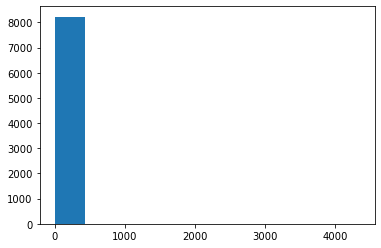

In [60]:
one_choice_only2 = np.concatenate(np.array(ch['unique']['per2'] , dtype=list)[ch['tot_num']['per2']==1])
u, c = np.unique(one_choice_only2, return_counts=True)

plt.hist(c)
np.sum(c>1)

In [63]:
one_choice_only1[one_choice_only1>-1].shape

(8259,)

In [64]:
one_choice_only2[one_choice_only2>-1].shape

(8227,)

In [92]:
matching_pair = []
for i,p in enumerate(ch['unique']['per2']):
    if ch['tot_num']['per2'][i]==1 and p[0]>-1:
        have_a_match = i in ch['unique']['per1'][p[0]] 
        matching_pair.append(have_a_match)
        if not have_a_match:
            print(f'pair is off: {i}') 
            print(f' tried to get paired with {p[0]} in tp1')
            print(f" but tp1 options are : {ch['unique']['per1'][p[0]]}")

pair is off: 2668
 tried to get paired with 2447 in tp1
 but tp1 options are : [-1]


In [93]:
matching_pair = []
for i,p in enumerate(ch['unique']['per1']):
    if ch['tot_num']['per1'][i]==1 and p[0]>-1:
        have_a_match = i in ch['unique']['per2'][p[0]] 
        matching_pair.append(have_a_match)
        if not have_a_match:
            print(f'pair is off: {i}') 
            print(f' tried to get paired with {p[0]} in tp2')
            print(f" but tp2 options are : {ch['unique']['per2'][p[0]]}")

pair is off: 8411
 tried to get paired with 9289 in tp2
 but tp2 options are : []


In [94]:
ptc2_pw[0].zyx['pix'][9289]

array([78.0, 569.0, 484.0])

array([56.0, 260.0, 303.0])

In [ ]:
mask = synapse_study.assign_to_block(blocks)
sum1 = np.sum(mask['per_idx1'], axis = 1)
plt.hist(sum1,bins = [0,1,2,3])

In [ ]:
[unique_match['per_idx1'][i] for i, l in enumerate(n_options['per_idx1']) if l>1]

In [ ]:
n_options

In [ ]:
stim = [2,2,2,3,3,3,5,5,5]
blanks = [15, 18, 21, 27]

pairs = []
for s in stim:
    pair = [s, np.random.choice(blanks)]
    pairs.append(pair)
pairs = np.array(pairs)

order = np.arange(9)
np.random.shuffle(order)

ordered_pairs = np.r_[pairs[order],pairs[order],pairs[order],pairs[order]]
pairs[order]

In [ ]:
cycle_time = np.sum(pairs[:,1]) + 9*3
print( f'Cycle time\n{cycle_time}, s\n {cycle_time/60}, min')

In [ ]:
time = np.cumsum(ordered_pairs[:,1])
signal = ordered_pairs[:,0]
plt.figure(figsize = (15,5))
plt.stem(time,signal)

In [ ]:
plt.figure(figsize = (15,5))
plt.stem(time,signal==2)

In [ ]:
plt.figure(figsize = (15,5))
plt.stem(time,signal==3)

In [ ]:
plt.figure(figsize = (15,5))
plt.stem(time,signal==5)